<a href="https://colab.research.google.com/github/Isnup/TensorFLOWlite/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
5/5 [==============================] - 6s 1s/step - loss: 1.3864 - accuracy: 0.5188 - val_loss: 0.6882 - val_accuracy: 0.4750
Epoch 2/10
5/5 [==============================] - 4s 734ms/step - loss: 0.6646 - accuracy: 0.5688 - val_loss: 0.6112 - val_accuracy: 0.7000
Epoch 3/10
5/5 [==============================] - 6s 1s/step - loss: 0.5960 - accuracy: 0.7937 - val_loss: 0.5372 - val_accuracy: 0.9250
Epoch 4/10
5/5 [==============================] - 4s 740ms/step - loss: 0.4901 - accuracy: 0.9438 - val_loss: 0.4110 - val_accuracy: 0.9250
Epoch 5/10
5/5 [==============================] - 4s 773ms/step - loss: 0.3676 - accuracy: 0.9250 - val_loss: 0.3326 - val_accuracy: 0.8500
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 0.2664 - accuracy: 0.9250 - val_loss: 0.2472 - val_accuracy: 0.9500
Epoch 7/10
5/5 [==============================] - 4s 742ms/step - loss: 0.1796 - accuracy: 0.9625 - val_loss: 0.1720 - val_accuracy: 0.9250
Epoch 8/10
5/5 [=============

Saving 07.png to 07.png
CAIXA INCOMPLETA


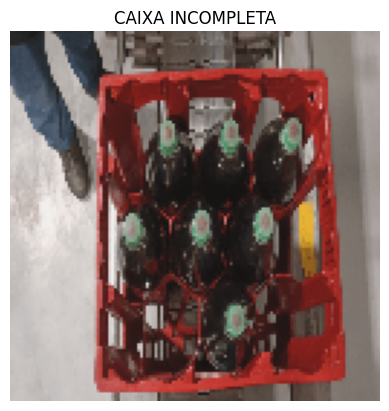

Saving E.png to E (2).png
CAIXA COMPLETA


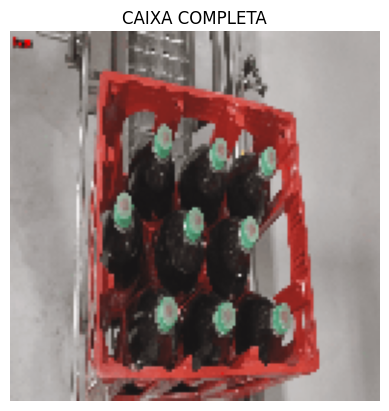

Saving C.png to C.png
CAIXA INCOMPLETA


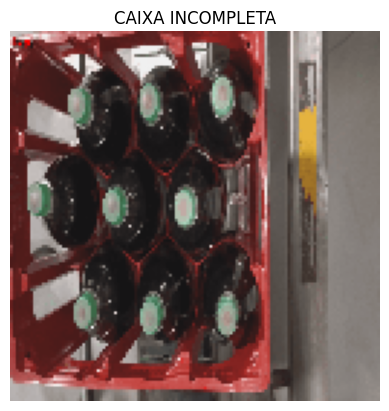

Saving H.png to H.png
CAIXA COMPLETA


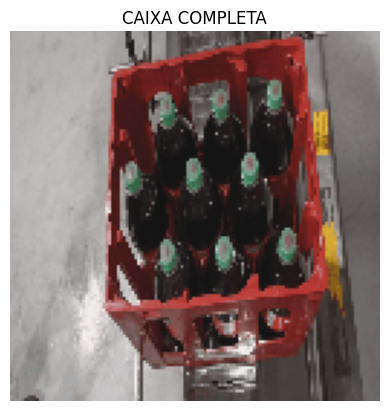

Saving 01.png to 01.png
CAIXA INCOMPLETA


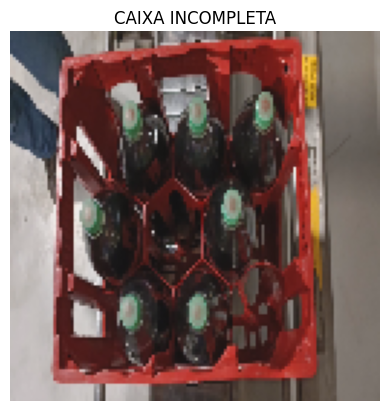

Saving 03.png to 03 (1).png
CAIXA INCOMPLETA


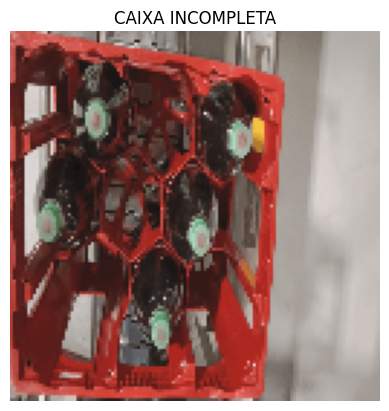

Saving K.png to K.png
CAIXA COMPLETA


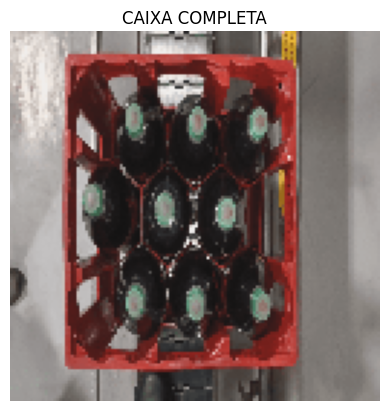

Saving A.png to A.png
CAIXA COMPLETA


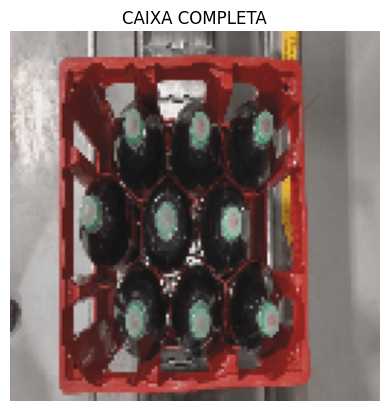

Saving J.png to J.png
CAIXA COMPLETA


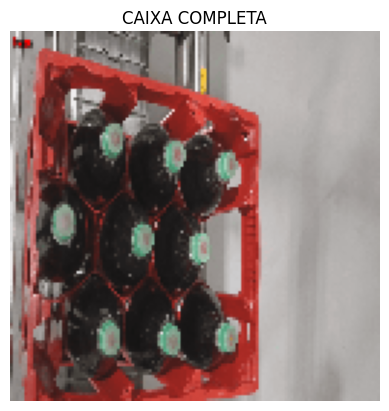

Saving 10.png to 10.png
CAIXA INCOMPLETA


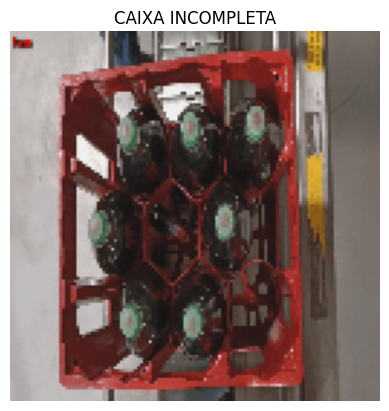

Saving 01 (1).png to 01 (1).png
CAIXA INCOMPLETA


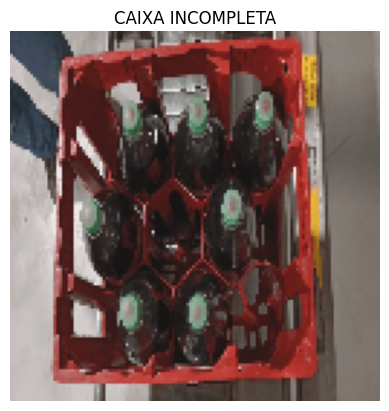

Saving 02.png to 02.png
CAIXA INCOMPLETA


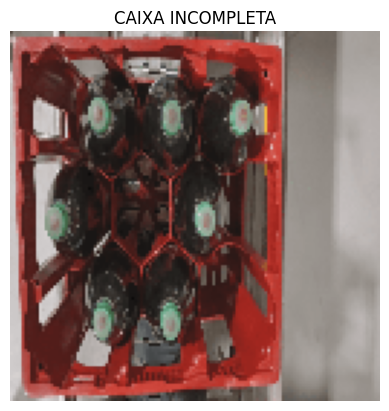

Saving 03.png to 03 (2).png
CAIXA INCOMPLETA


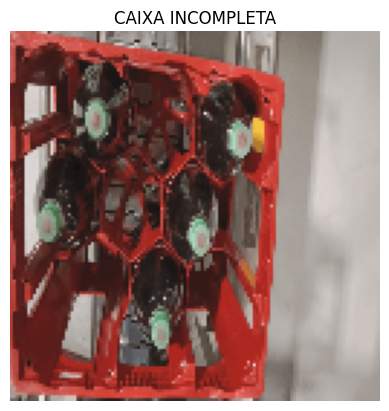

Saving 04.png to 04.png
CAIXA INCOMPLETA


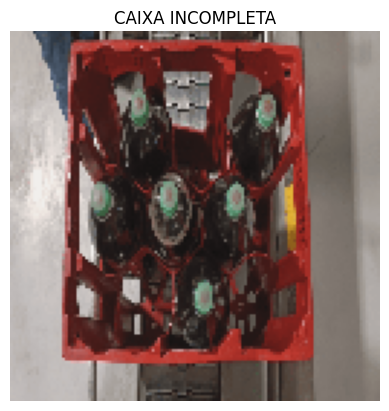

Saving 05.png to 05.png
CAIXA INCOMPLETA


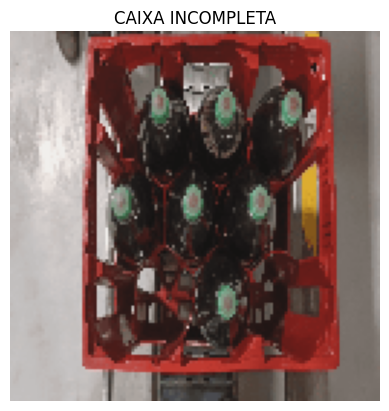

Saving 06.png to 06.png
CAIXA INCOMPLETA


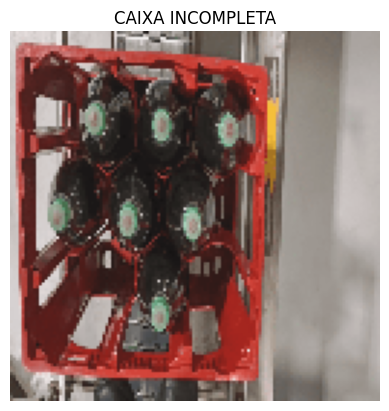

Saving 07.png to 07 (1).png
CAIXA INCOMPLETA


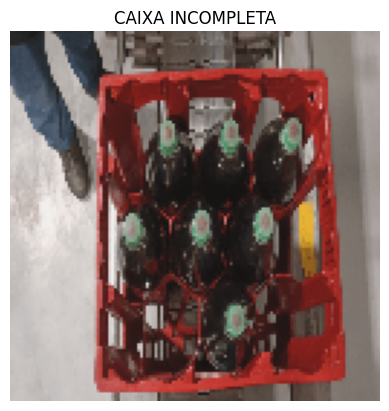

Saving 08.png to 08.png
CAIXA INCOMPLETA


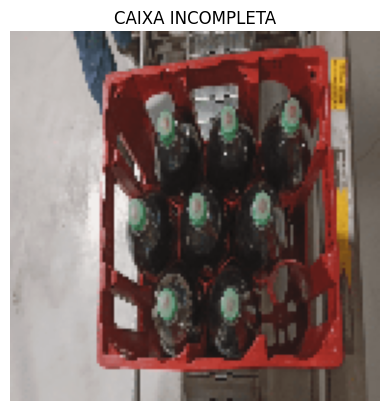

Saving 09.png to 09.png
CAIXA INCOMPLETA


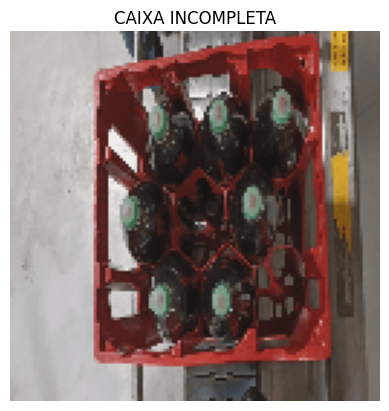

Saving 10.png to 10 (1).png
CAIXA INCOMPLETA


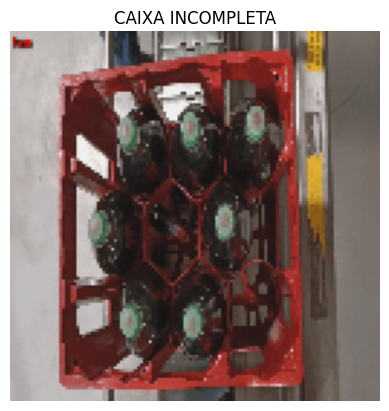

Saving A.png to A (1).png
CAIXA COMPLETA


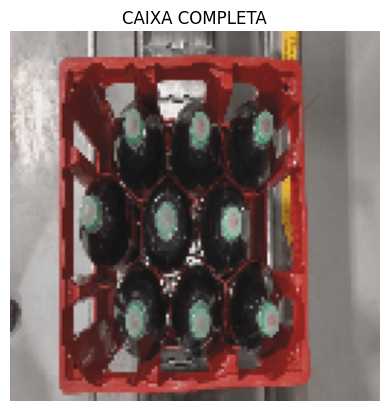

Saving B.png to B (2).png
CAIXA COMPLETA


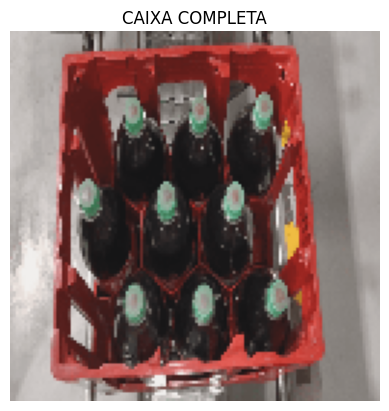

Saving C.png to C (1).png
CAIXA INCOMPLETA


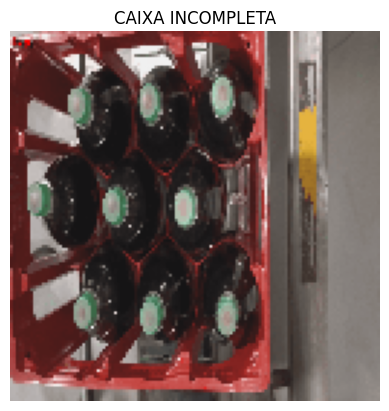

Saving D.png to D (1).png
CAIXA COMPLETA


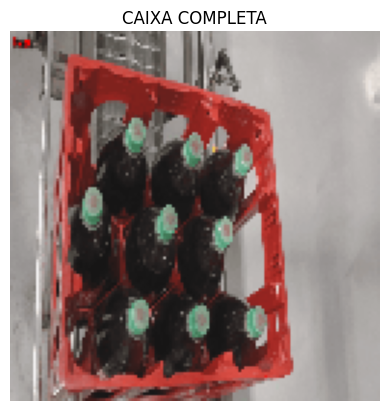

Saving E.png to E (3).png
CAIXA COMPLETA


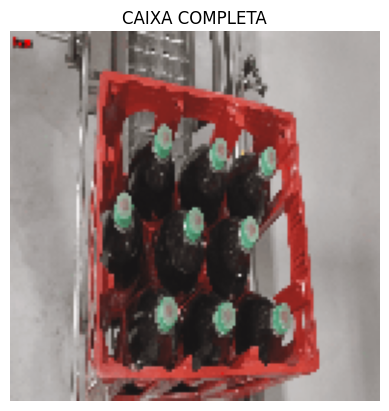

Saving F.png to F.png
CAIXA COMPLETA


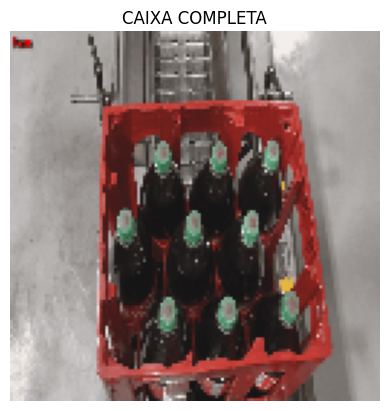

Saving G.png to G.png
CAIXA COMPLETA


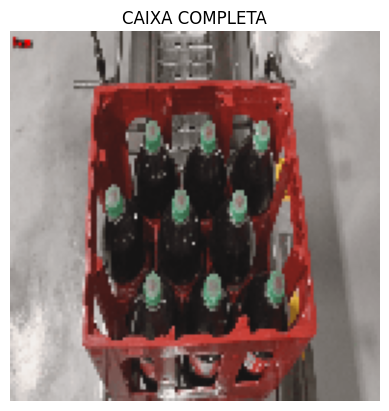

Saving G.png to G (1).png
CAIXA COMPLETA


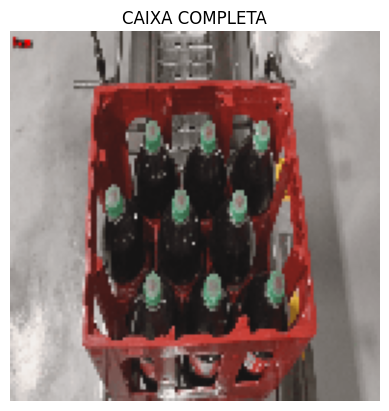

Saving H.png to H (1).png
CAIXA COMPLETA


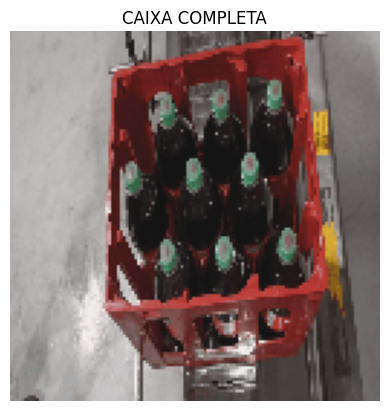

Saving I.png to I.png
CAIXA INCOMPLETA


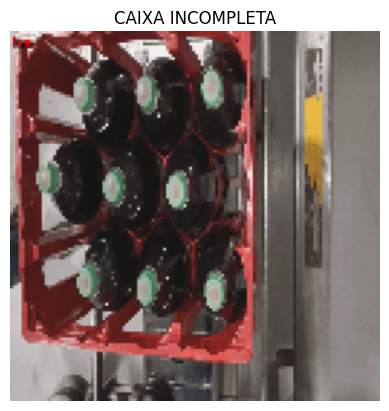

Saving J.png to J (1).png
CAIXA COMPLETA


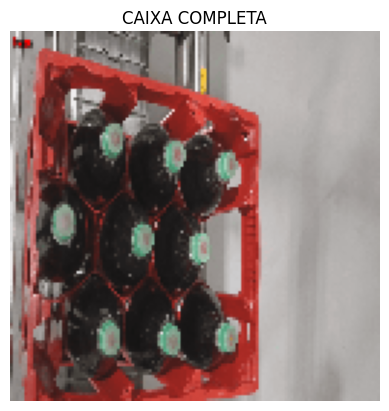

Saving K.png to K (1).png
CAIXA COMPLETA


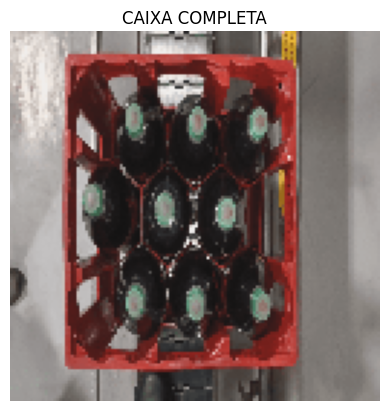

KeyboardInterrupt: 

In [17]:
import tensorflow as tf
from google.cloud import storage
import os
import numpy as np
from sklearn.model_selection import train_test_split
from google.oauth2 import service_account
import matplotlib.pyplot as plt
from google.colab import files

# Configurações do bucket
BUCKET_NAME = 'deteccao_caixa_cheia'
FOLDER_COMPLETE = 'CAIXA COMPLETA'
FOLDER_INCOMPLETE = 'CAIXA INCOMPLETA'

# Caminho para o arquivo JSON da API
credentials_path = '/content/brilliant-tower-423920-d0-18f95ca9a6f2.json'  # Substitua pelo nome do seu arquivo

# Inicializar o cliente de storage
credentials = service_account.Credentials.from_service_account_file(credentials_path)
client = storage.Client(credentials=credentials)

# Função para carregar imagens de um bucket e salvar localmente
def download_images_to_local(bucket_name, folder_name, local_folder):
    if not os.path.exists(local_folder):
        os.makedirs(local_folder)
    bucket = client.bucket(bucket_name)
    blobs = bucket.list_blobs(prefix=folder_name)
    for blob in blobs:
        if blob.name.endswith('.jpg') or blob.name.endswith('.png'):
            file_path = os.path.join(local_folder, os.path.basename(blob.name))
            blob.download_to_filename(file_path)

# Baixar imagens das duas pastas
download_images_to_local(BUCKET_NAME, FOLDER_COMPLETE, 'complete_images')
download_images_to_local(BUCKET_NAME, FOLDER_INCOMPLETE, 'incomplete_images')

# Função para carregar imagens de uma pasta local
def load_images_from_local(folder_path, label):
    images = []
    labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            img_path = os.path.join(folder_path, file_name)
            img = tf.image.decode_image(tf.io.read_file(img_path))
            img = tf.image.resize(img, [128, 128])
            img = img / 255.0
            images.append(img)
            labels.append(label)
    return images, labels

# Carregar imagens das pastas locais
complete_images, complete_labels = load_images_from_local('complete_images', 0)
incomplete_images, incomplete_labels = load_images_from_local('incomplete_images', 1)

# Combinar e criar arrays numpy
images = np.array(complete_images + incomplete_images)
labels = np.array(complete_labels + incomplete_labels)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Criar datasets do TensorFlow
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Treinar um Modelo com TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),  # Reduzindo o número de unidades
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds, epochs=10, validation_data=test_ds)  # Reduzindo o número de épocas

# Converter o Modelo para TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Executar Inferência com o Modelo TensorFlow Lite
from tflite_runtime.interpreter import Interpreter

# Carregar o modelo TensorFlow Lite
interpreter = Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Obter detalhes das entradas e saídas
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Função para fazer upload de imagem
def upload_image():
    uploaded = files.upload()
    for file_name in uploaded.keys():
        img_path = file_name
        return img_path

# Função para carregar e preprocessar a imagem
def load_and_preprocess_image(img_path):
    img = tf.image.decode_image(tf.io.read_file(img_path))
    img = tf.image.resize(img, [128, 128])
    img = img / 255.0
    return img

# Função para análise da imagem
def analyze_image(img_path):
    # Carregar e preprocessar a imagem
    input_image = load_and_preprocess_image(img_path)
    input_image = np.expand_dims(input_image, axis=0).astype(np.float32)

    # Executar inferência na imagem carregada
    interpreter.set_tensor(input_details[0]['index'], input_image)
    interpreter.invoke()

    # Obter resultado
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_label = np.argmax(output_data[0])

    # Imprimir o resultado como "CAIXA COMPLETA" ou "CAIXA INCOMPLETA"
    result = "CAIXA COMPLETA" if predicted_label == 0 else "CAIXA INCOMPLETA"
    print(result)

    # Exibir a imagem analisada
    plt.imshow(input_image[0])
    plt.title(result)
    plt.axis('off')
    plt.show()

# Loop para permitir o upload e análise repetidos da imagem
while True:
    # Fazer upload da imagem
    uploaded_image_path = upload_image()

    # Analisar a imagem
    analyze_image(uploaded_image_path)
